In [9]:
#Reading the text file
import csv

with open('wiki-Vote.txt') as f:
    lines = f.readlines()

edge_list = []

count = 1
for i in lines:
    if(count>4):
        x = i.split()
        edge = []
        edge.append(int(x[0]))
        edge.append(int(x[1]))
        edge_list.append(edge)
    count  = count + 1

headings = ['fromNodeID', 'toNodeID']

# Saving the Edge List in a CSV for further use
with open('EdgeList.csv', 'w') as f:
    write_to_csv = csv.writer(f)
    write_to_csv.writerow(headings)
    write_to_csv.writerows(edge_list)


In [3]:
import pandas as pd
import csv

df1 = pd.read_csv('EdgeList.csv')

len_df1 = len(df1.index)
heading_list = []

for i in range(len_df1):
    row_no = df1.iloc[i,1]
    col_no = df1.iloc[i,0]
    if(row_no not in heading_list):
        heading_list.append(row_no)
    if(col_no not in heading_list):
        heading_list.append(col_no)

print(len(heading_list))
heading_list.sort()
# heading_list

7115


In [4]:
import pandas as pd

#Adjacency Matrix is saved in adjacency_df
adjacency_df = pd.DataFrame(0, index=heading_list, columns=heading_list)
# adjacency_df

df1 = pd.read_csv('EdgeList.csv')

max_fromNodeID = df1['fromNodeID'].max()
max_toNodeID = df1['toNodeID'].max()
max_ID = max_toNodeID

if(max_fromNodeID>max_ID):
    max_ID = max_fromNodeID

# print(max_ID) = 8297
#For Adjacency Matrix of Directed Graph, we are following the convention where
#row in matrix corresponds to the "toNodeID" and columns refer to "fromNodeID"

len_df1 = len(df1.index)


adjacency_mat = [[0 for col in range(len(heading_list))] for row in range(len(heading_list))]


for i in range(len_df1):
    row_no = df1.iloc[i,1]
    col_no = df1.iloc[i,0]
    row_index = heading_list.index(row_no)
    # print(row_index)
    col_index = heading_list.index(col_no)
    adjacency_mat[row_index][col_index] = adjacency_mat[row_index][col_index] + 1
    
adjacency_df = pd.DataFrame(adjacency_mat, index=heading_list, columns=heading_list)

# adjacency_df

In [21]:

adjacency_df.to_csv('AdjacencyMatrix.csv')

In [30]:
#We know the in-degree and out-degree are the same in a directed graph, formula used is (number of edges)/(number of nodes)
#number of links = number of edges = length of edge list

df_edge_list = pd.read_csv('EdgeList.csv')
df_adj_mat = pd.read_csv('AdjacencyMatrix.csv')

# Number of edges in the graph is the number of links in a network
num_links = len(df_edge_list.index)
#103689

#number of nodes = length of adjacency matrix, are the number of vertices of a graph
num_nodes = len(df_adj_mat.index)
#7115

avg_in_degree = num_links/num_nodes
avg_out_degree = num_links/num_nodes

max_in_degree = 0 
max_out_degree = 0
node_max_in_degree = 0
node_max_out_degree = 0
row_sum = adjacency_df.sum(axis = 'columns')
col_sum = adjacency_df.sum()


for i in range(num_nodes):
    if (row_sum[heading_list[i]] > max_in_degree):
        max_in_degree = row_sum[heading_list[i]]
        node_max_in_degree = heading_list[i]
    if(col_sum[heading_list[i]] > max_out_degree):
        node_max_out_degree = heading_list[i]
        max_out_degree = col_sum[heading_list[i]]




print("1. Number of Nodes are ", num_nodes)
print("2. Number of Edges are ", num_links)
print("3. Average In Degree is ", avg_in_degree)
print("4. Average Out Degree is ", avg_out_degree)
print("Max In Degree is ", max_in_degree)
print("Max Out Degree is ", max_out_degree)
print("5. Node having Max In Degree is ", node_max_in_degree)
print("6. Node having Max Out Degree is ", node_max_out_degree)


# For calculating network density, we first need to find out the maximum number of edges possible in this network
# Maximum number of edges possible = |Num_of_vertices| * (|Num_of_vertices| - 1)
# Density of network = (edges present in the graph)/(maximum number of edges possible)

max_num_edges_poss = num_nodes * (num_nodes - 1)
graph_density = num_links/max_num_edges_poss

print("Maximum Number of Edges Possible in this graph are ", max_num_edges_poss)
print("7. The Density of the Network is ", graph_density)


1. Number of Nodes are  7115
2. Number of Edges are  103689
3. Average In Degree is  14.573295853829936
4. Average Out Degree is  14.573295853829936
Max In Degree is  457
Max Out Degree is  893
5. Node having Max In Degree is  4037
6. Node having Max Out Degree is  2565
Maximum Number of Edges Possible in this graph are  50616110
7. The Density of the Network is  0.0020485375110809584


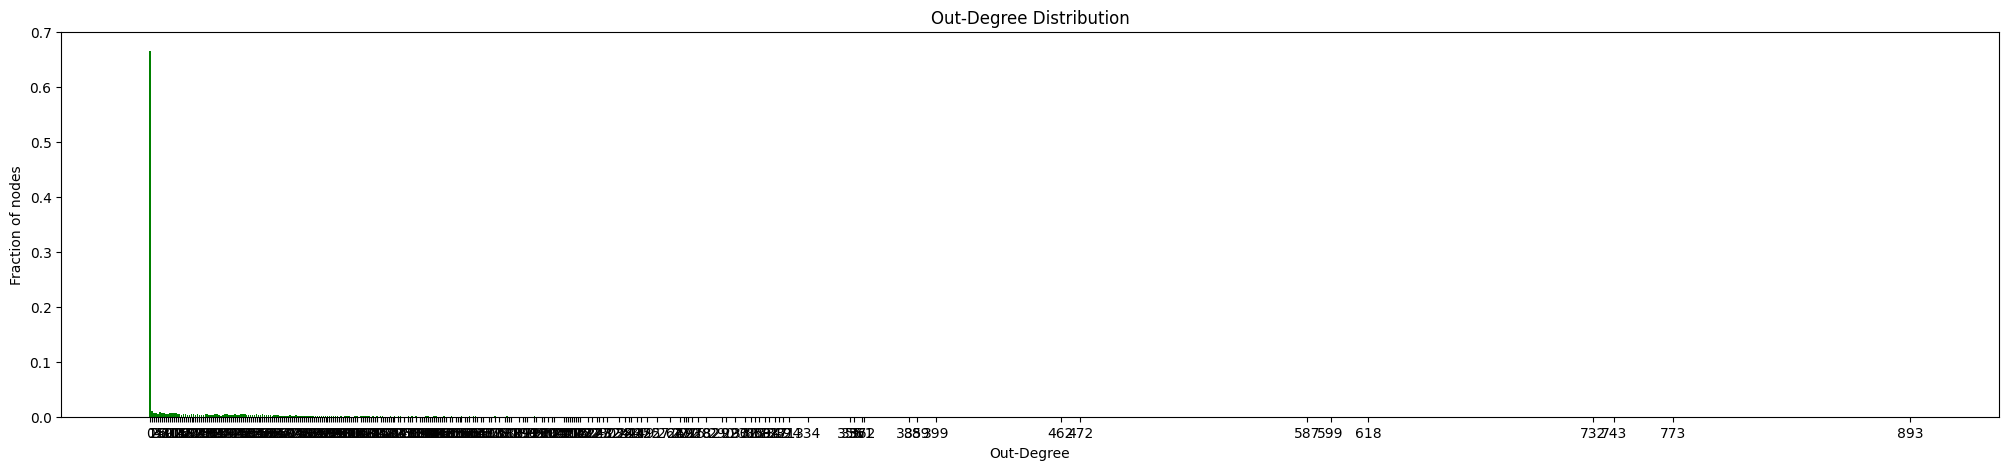

In [37]:
#Plotting the in-degree and out-degree distribution

import numpy as np
import matplotlib.pyplot as plt

#For In-Degree
row_sum = adjacency_df.sum(axis = 'columns')
in_deg_dict = {}

for i in row_sum:
    if i not in in_deg_dict:
        in_deg_dict[i] = 1/len(row_sum)
    else:
        in_deg_dict[i] = in_deg_dict[i] + 1/len(row_sum)

in_deg_list = list(in_deg_dict.keys())
in_deg_node_fraction = list(in_deg_dict.values())
fig = plt.figure(figsize = (25, 5))
plt.bar(in_deg_list, in_deg_node_fraction, color='blue')
plt.ylim(0, 0.7)
plt.xlabel("In-Degree")
plt.ylabel("Fraction of nodes")
plt.title("In-Degree Distribution")
plt.xticks(in_deg_list)
plt.show()



# For Out-Degree
col_sum = adjacency_df.sum()
out_deg_dict = {}

for i in col_sum:
    if i not in in_deg_dict:
        out_deg_dict[i] = 1/len(col_sum)
    else:
        out_deg_dict[i] = in_deg_dict[i] + 1/len(col_sum)

out_deg_list = list(out_deg_dict.keys())
out_deg_node_fraction = list(out_deg_dict.values())
fig = plt.figure(figsize = (25, 5))
plt.bar(out_deg_list, out_deg_node_fraction, color='green')
plt.ylim(0, 0.7)
plt.xlabel("Out-Degree")
plt.ylabel("Fraction of nodes")
plt.title("Out-Degree Distribution")
plt.xticks(out_deg_list)
plt.show()


Calculating Local Clustering Co-efficient

In [54]:

# Storing the local clustering co-efficient of each node
local_clustering_coeff_dict = {}

# Storing the neighbours of each node
neighbour_list_dict = {}

# Storing the edges present b/w the neighbours of each node
local_current_edges_dict = {}

# Storing the frequency of each local clustering co-efficient
lcc_frequency_dict = {}


for i in range(len(heading_list)):

    # This loop looks for the neighbours for a node
    list_of_neighbours = []
    for j in range(len(heading_list)):
        if(adjacency_df.iloc[j].at[heading_list[i]] != 0):
            if heading_list[j] not in list_of_neighbours:
                list_of_neighbours.append(heading_list[j])
        if(adjacency_df.iloc[i].at[heading_list[j]] != 0):
            if heading_list[j] not in list_of_neighbours:
                list_of_neighbours.append(heading_list[j])

    # print("length", len(list_of_neighbours))
    # print(list_of_neighbours) 

    # Finding total number of neighbours for a node
    tot_neighbours = len(list_of_neighbours)
    tot_poss_edges = tot_neighbours * (tot_neighbours-1)

    # Storing the list of neighbours of each node, also known as adjacency list
    neighbour_list_dict[heading_list[i]] = list_of_neighbours

    # Initializing the number of current edges between neighbours as 0
    current_neighbour_edges = 0

    # This nested loop checks the list of neighbours, and compares each neighbour with the other to find neighbours having edges
    for k in range((tot_neighbours)):
        for l in range(k+1,tot_neighbours):
            row_n = heading_list.index(list_of_neighbours[k])
            col_n = heading_list.index(list_of_neighbours[l])
            if(adjacency_df.iloc[row_n].at[list_of_neighbours[l]] != 0):
                current_neighbour_edges +=1 
            if(adjacency_df.iloc[col_n].at[list_of_neighbours[k]] != 0):
                current_neighbour_edges +=1

    #Initializing the Local Clustering Co-efficient 0, in case a node does not have any possible edges
    lcc = 0
    if(tot_poss_edges > 0):
        lcc = current_neighbour_edges/tot_poss_edges
    
    print("Current Node ", heading_list[i])
    print("Total Current Edges ", current_neighbour_edges)
    print("Total Possible Edges ", tot_poss_edges)
    print("Local Clustering Coefficient ", lcc)

    local_current_edges_dict[heading_list[i]] = current_neighbour_edges
    local_clustering_coeff_dict[heading_list[i]] = lcc

    # Adding the frequency of the local clustering coefficient 
    if(lcc not in lcc_frequency_dict):
        lcc_frequency_dict[lcc] = 1
    else:
        lcc_frequency_dict[lcc] = lcc_frequency_dict[lcc] + 1


Current Node  3
Total Current Edges  295
Total Possible Edges  2550
Local Clustering Coefficient  0.11568627450980393
Current Node  4
Total Current Edges  111
Total Possible Edges  812
Local Clustering Coefficient  0.13669950738916256
Current Node  5
Total Current Edges  97
Total Possible Edges  506
Local Clustering Coefficient  0.191699604743083
Current Node  6
Total Current Edges  3318
Total Possible Edges  98282
Local Clustering Coefficient  0.033759996744063
Current Node  7
Total Current Edges  51
Total Possible Edges  552
Local Clustering Coefficient  0.09239130434782608
Current Node  8
Total Current Edges  2394
Total Possible Edges  46872
Local Clustering Coefficient  0.051075268817204304
Current Node  9
Total Current Edges  351
Total Possible Edges  6480
Local Clustering Coefficient  0.05416666666666667
Current Node  10
Total Current Edges  736
Total Possible Edges  9702
Local Clustering Coefficient  0.07586064728921872
Current Node  11
Total Current Edges  14401
Total Possible 

In [55]:
lcc_frequency_dict

{0.11568627450980393: 1,
 0.13669950738916256: 1,
 0.191699604743083: 1,
 0.033759996744063: 1,
 0.09239130434782608: 2,
 0.051075268817204304: 1,
 0.05416666666666667: 5,
 0.07586064728921872: 1,
 0.02612160941473519: 1,
 0.051201923076923075: 1,
 0.11818181818181818: 8,
 0.030740568234746156: 1,
 0.03164697603792452: 1,
 0.11904761904761904: 22,
 0.08787878787878788: 1,
 0.12878787878787878: 4,
 0.1588345864661654: 1,
 0.03306307860387557: 1,
 0.030526315789473683: 1,
 0.0: 3140,
 0.08277591973244147: 1,
 0.04190308073803219: 1,
 0.10074906367041199: 1,
 0.060582306830907054: 1,
 0.03805086390992041: 1,
 0.04513005505980634: 1,
 0.05508128805473605: 1,
 0.08068783068783068: 1,
 0.05238095238095238: 3,
 0.09191176470588236: 2,
 0.11623376623376623: 1,
 0.1600790513833992: 1,
 0.08092508558235809: 1,
 0.05561829474872953: 1,
 0.06842105263157895: 3,
 0.19658119658119658: 1,
 0.10163850486431132: 1,
 0.09090909090909091: 16,
 0.07241379310344828: 1,
 0.03677221654749745: 1,
 0.083333333

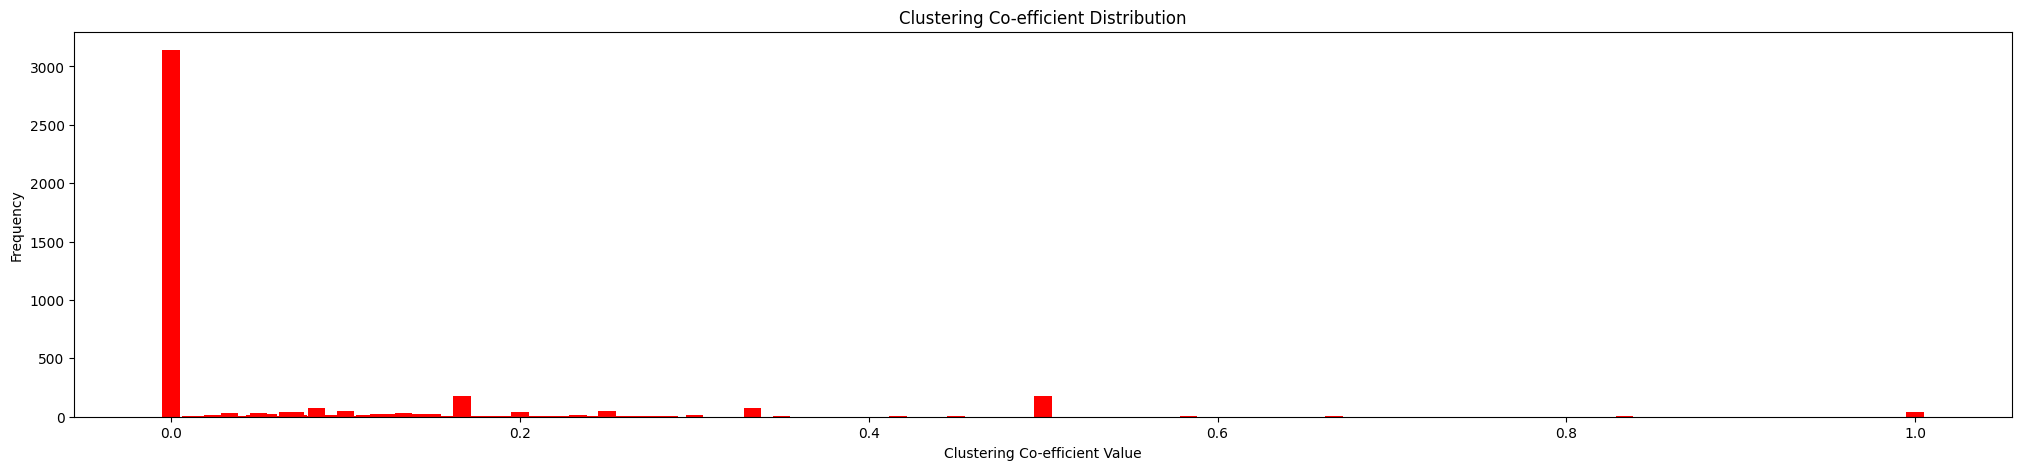

In [59]:
import matplotlib.pyplot as plt

lcc_val_list = list(lcc_frequency_dict.keys())
lcc_freq_list = list(lcc_frequency_dict.values())
fig = plt.figure(figsize = (25, 5))
plt.bar(lcc_val_list, lcc_freq_list, color='red', width=0.01)
# plt.ylim(0, 0.7)
plt.xlabel("Clustering Co-efficient Value")
plt.ylabel("Frequency")
plt.title("Clustering Co-efficient Distribution")
# plt.xticks(out_deg_list)
plt.show()

In [60]:
import pickle

freq_coeff = open('Frequency_Clustering_Coefficient', 'ab')
pickle.dump(lcc_frequency_dict, freq_coeff, protocol=2)                     
freq_coeff.close()

In [61]:
import pickle

cluster_coeff = open('Local_Clustering_Coefficient', 'ab')
pickle.dump(local_clustering_coeff_dict, cluster_coeff, protocol=2)                     
cluster_coeff.close()

In [62]:
import pickle

edges_neigh = open('Edges_of_Neighbours_of_Node', 'ab')
pickle.dump(local_current_edges_dict, edges_neigh, protocol=2)                     
edges_neigh.close()

In [ ]:
import pickle

list_neigh = open('List_of_Neighbours', 'ab')
pickle.dump(neighbour_list_dict, list_neigh, protocol=2)                     
list_neigh.close()